#**Introduction**



Congratulations on reaching this point of the course! 

As a capstone project, you will perform a complete differential expression analysis pipeline integrating key concepts from all the modules covered thus far. This will provide an opportunity to combine your fundamental UNIX, Python, R, and computational biology skills to produce interpretable results. 

The transcriptomic data you will use for this project originates from the work of Arunachalam et al. and is described in their journal article: [Systems biological assessment of immunity to mild versus severe COVID-19 infection in humans](https://www.science.org/doi/10.1126/science.abc6261). Their study sought to address the COVID-19 pandemic by investigating connections between the human immune response to SARS-CoV-2 and severity of infection. To achieve this, they conducted RNA-Seq on bulk peripheral blood mononuclear cells (PBMCs) of both healthy and COVID-19 infected individuals. It is these two cohorts that will serve as the subject of your project.

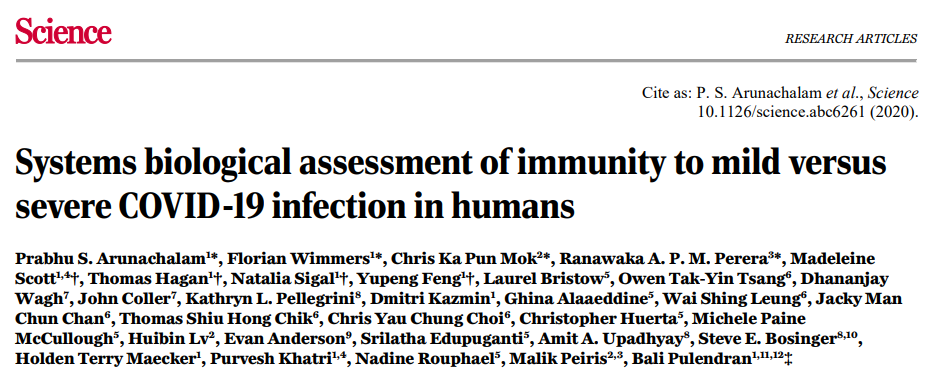

#**Instructions**

In a copy of this Google Colab notebook, follow the steps outlined below to fill in all `code-blocks` and answer the questions denoted by <font color='red'>red text</font>. You may freely reference any of the code provided to you in the previous lab assignments. 

Once complete, submit your copied notebook to your individual Google Drive folder.

You will be graded based on two categories: your responses to the questions, and whether your Colab notebook can produce correct output.

And with that, Good Luck! 


#**Part 1: Preparing the data**

Your first task is to download the dataset we have prepared for you. Your data is stored in a directory labeled with your name and can be accessed from the following repository: [CynthiaFlaire/USMF_Curs-Bioinformatica-2022_Datasets](https://github.com/CynthiaFlaire/USMF_Curs-Bioinformatica-2022_Datasets). 

Upon opening your designated folder, you will find two subfolders named 'COVID' and 'Healthy', each containing three compressed FASTQ files from the respective cohort.

**Question 1.** To download a specific file from a typical file-hosting website directly into a notebook, which of the following is strictly necessary?

* A) a webpage link
* B) a direct link
* C) either a webpage or direct link
* D) a repository link

<font color='red'>Type your answer here.</font> 

B) a direct link

On GitHub, you can obtain this kind of link by navigating to your file of interest and right-clicking on the Download button shown in the screenshot below. Then, by clicking `Copy link address`, the link will be copied to your clipboard and can be pasted as text.

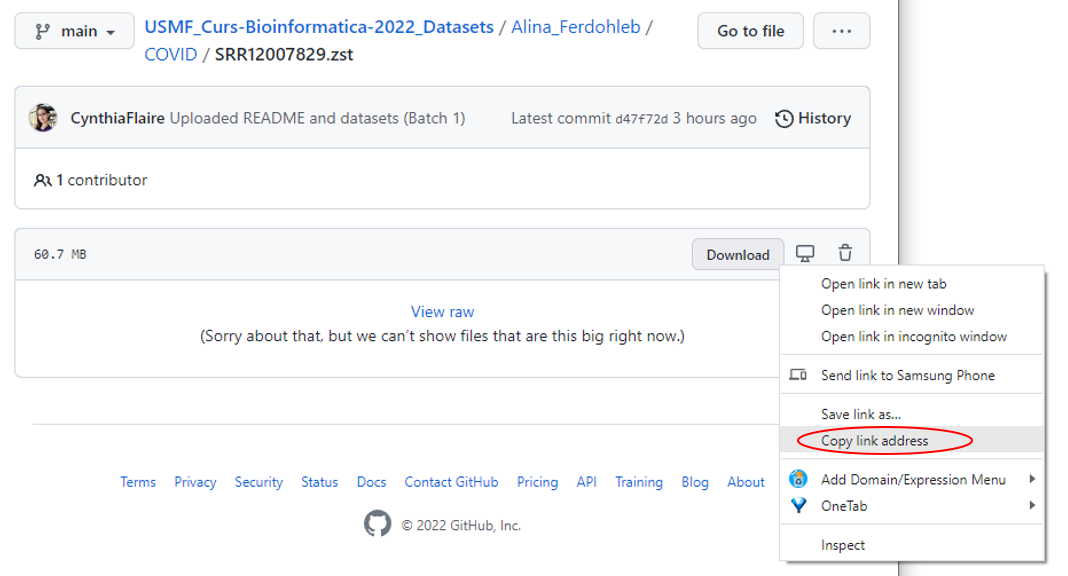

Peform this six times to get the links for all six of your samples. You may store them in the text box below for your convenience:

_COVID_

https://github.com/CynthiaFlaire/USMF_Curs-Bioinformatica-2022_Datasets/raw/main/Galea-Abdu%C8%99a_Daniela/COVID/SRR12007829.fastq.zst 

https://github.com/CynthiaFlaire/USMF_Curs-Bioinformatica-2022_Datasets/raw/main/Galea-Abdu%C8%99a_Daniela/COVID/SRR12007844.fastq.zst

https://github.com/CynthiaFlaire/USMF_Curs-Bioinformatica-2022_Datasets/raw/main/Galea-Abdu%C8%99a_Daniela/COVID/SRR12007847.fastq.zst

----

_Healthy_

https://github.com/CynthiaFlaire/USMF_Curs-Bioinformatica-2022_Datasets/raw/main/Galea-Abdu%C8%99a_Daniela/Healthy/SRR12007865.fastq.zst

https://github.com/CynthiaFlaire/USMF_Curs-Bioinformatica-2022_Datasets/raw/main/Galea-Abdu%C8%99a_Daniela/Healthy/SRR12007867.fastq.zst

https://github.com/CynthiaFlaire/USMF_Curs-Bioinformatica-2022_Datasets/raw/main/Galea-Abdu%C8%99a_Daniela/Healthy/SRR12007869.fastq.zst

Next, create a directory to store your data called `data` in the code-block below:

In [1]:
%%bash
mkdir data
ls

data
sample_data


Next, download your files into the `data` directory using one or more code-blocks below:

In [2]:
%%bash
cd data
wget -nv -O SRR12007829.fastq.zst 'https://github.com/CynthiaFlaire/USMF_Curs-Bioinformatica-2022_Datasets/raw/main/Galea-Abdu%C8%99a_Daniela/COVID/SRR12007829.fastq.zst' &>/dev/null
wget -nv -O SRR12007844.fastq.zst 'https://github.com/CynthiaFlaire/USMF_Curs-Bioinformatica-2022_Datasets/raw/main/Galea-Abdu%C8%99a_Daniela/COVID/SRR12007844.fastq.zst' &>/dev/null
wget -nv -O SRR12007847.fastq.zst 'https://github.com/CynthiaFlaire/USMF_Curs-Bioinformatica-2022_Datasets/raw/main/Galea-Abdu%C8%99a_Daniela/COVID/SRR12007847.fastq.zst' &>/dev/null
wget -nv -O SRR12007865.fastq.zst 'https://github.com/CynthiaFlaire/USMF_Curs-Bioinformatica-2022_Datasets/raw/main/Galea-Abdu%C8%99a_Daniela/Healthy/SRR12007865.fastq.zst' &>/dev/null
wget -nv -O SRR12007867.fastq.zst 'https://github.com/CynthiaFlaire/USMF_Curs-Bioinformatica-2022_Datasets/raw/main/Galea-Abdu%C8%99a_Daniela/Healthy/SRR12007867.fastq.zst' &>/dev/null
wget -nv -O SRR12007869.fastq.zst 'https://github.com/CynthiaFlaire/USMF_Curs-Bioinformatica-2022_Datasets/raw/main/Galea-Abdu%C8%99a_Daniela/Healthy/SRR12007869.fastq.zst' &>/dev/null

Notice that these files have a secondary extension, `.fastq.zst`, similar to the `.fastq.gz`/`.fq.gz` extension you have seen before. Similar to `gz`, the `.zst` extension signifies that the file was compressed with a command-line program, in this case, `zstd`. The key difference between them is that `zstd` peforms better by several metrics (ex. compression speed & compression ratio). 

To decompress your `.fastq.zst` samples for further use, you need to install `zstd`

**Question 2.** `zstd` is a command-line program. As such, which of the following methods should you use to download it?

* A) Python's `import` keyword
* B) Bioconductor's `install()` function
* C) CRAN's `install.packages()` function
* D) `conda` or `mamba`

<font color='red'>Type your answer here.</font> 

 D) `conda` or `mamba`

**Question 3.** Does the method you chose support custom environments? Additionally, what are environments used for?

<font color='red'>Type your answer here.</font> Yes, both conda and mamba suport custom environments. A virtual environment is a environment where libraries and scripts installed into it are isolated from those installed in other virtual environments

**Question 4.** After setting up two environments: one named `envOne` with `bwa` installed, and another named `envTwo` with `bowtie2` installed, what type of message will the code below output? Explain wahy this occurs.

```
%%bash
source activate envOne
bowtie2 --help
```

In [3]:
%%bash
source activate envOne
bowtie2 --help

bash: line 1: activate: No such file or directory
bash: line 2: bowtie2: command not found


<font color='red'>Type your answer here.</font> 

The code above returns this type of message: bash: *line 2: bowtie2: command not found* because bowtie2 is not created in the envTwo environment.

Now, use your chosen method to download `zstd`. Do so using one or more code-blocks below:

In [4]:
#Install Miniconda 4.10.3.
%%bash
wget https://repo.anaconda.com/miniconda/Miniconda3-py39_4.10.3-Linux-x86_64.sh &>/dev/null
chmod u+x Miniconda3-py39_4.10.3-Linux-x86_64.sh
./Miniconda3-py39_4.10.3-Linux-x86_64.sh -b -f -p /usr/local &>/dev/null

In [5]:
%%bash
ls -lha

total 64M
drwxr-xr-x 1 root root 4.0K Apr 21 10:19 .
drwxr-xr-x 1 root root 4.0K Apr 21 10:18 ..
drwxr-xr-x 1 root root 4.0K Apr  8 13:31 .config
drwxr-xr-x 2 root root 4.0K Apr 21 10:19 data
-rwxr--r-- 1 root root  64M Jul 21  2021 Miniconda3-py39_4.10.3-Linux-x86_64.sh
drwxr-xr-x 1 root root 4.0K Apr  8 13:32 sample_data


In [6]:
%%bash
conda install -c conda-forge mamba --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - mamba


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |            1_gnu          22 KB  conda-forge
    bzip2-1.0.8                |       h7f98852_4         484 KB  conda-forge
    c-ares-1.18.1              |       h7f98852_0         113 KB  conda-forge
    ca-certificates-2021.10.8  |       ha878542_0         139 KB  conda-forge
    certifi-2021.10.8          |   py39hf3d152e_2         145 KB  conda-forge
    conda-4.12.0               |   py39hf3d152e_0        1014 KB  conda-forge
    icu-58.2                   |    hf484d3e_1000        22.6 MB  conda-forge
    keyutils-1.6.1             |       h166bdaf_0         115 KB  conda-forge
    krb5-1.19.3   



==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [7]:
#Create a new conda environment called envOne
%%bash
conda create --name envOne --yes


Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local/envs/envOne



Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
#
# To activate this environment, use
#
#     $ conda activate envOne
#
# To deactivate an active environment, use
#
#     $ conda deactivate



In [8]:
#Install Zstd using Mamba.
%%bash
source activate envOne
mamba install -c conda-forge zstd --yes

Transaction

  Prefix: /usr/local/envs/envOne

  Updating specs:

   - zstd


  Package          Version  Build          Channel                    Size
────────────────────────────────────────────────────────────────────────────
  Install:
────────────────────────────────────────────────────────────────────────────

  + _libgcc_mutex      0.1  conda_forge    conda-forge/linux-64     Cached
  + _openmp_mutex      4.5  1_gnu          conda-forge/linux-64     Cached
  + libgcc-ng       11.2.0  h1d223b6_15    conda-forge/linux-64     Cached
  + libgomp         11.2.0  h1d223b6_15    conda-forge/linux-64     Cached
  + libstdcxx-ng    11.2.0  he4da1e4_15    conda-forge/linux-64     Cached
  + libzlib         1.2.11  h166bdaf_1014  conda-forge/linux-64       61kB
  + lz4-c            1.9.3  h9c3ff4c_1     conda-forge/linux-64     Cached
  + xz               5.2.5  h516909a_1     conda-forge/linux-64      352kB
  + zstd             1.5.2  ha95c52a_0     conda-forge/linux-64      469kB

  Sum

warning  libmamba Could not parse mod/etag header
warning  libmamba Could not parse mod/etag header
warning  libmamba Could not parse mod/etag header
warning  libmamba Could not parse mod/etag header


Now that `zstd` is installed, call it below to decompress each of your `.fastq.gz` files. This will take the `-d`/`--decompress` flag, and the file to decompress as an argument.

In [9]:
%%bash
source activate envOne
for file in data/*.fastq.zst; do
  zstd -d $file
done

The next step is to perform quality control on your FASTQ files. This will remove bad reads that could potentially skew the results you produce. A handy all-in-one program to perform quality control is `fastp`, another command-line program. Install `fastp` in one or more code-blocks below. 

( _Hint:_ If you experience trouble installing `fastp`, try using a new environment. )

In [10]:
#Create a new conda environment called envTwo
%%bash
mamba create --name envTwo --yes


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.22.1) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: []

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing t

In [11]:
#Install fastp using Mamba.
%%bash
source activate envTwo
mamba install -c bioconda fastp --yes

Transaction

  Prefix: /usr/local/envs/envTwo

  Updating specs:

   - fastp


  Package          Version  Build        Channel                  Size
────────────────────────────────────────────────────────────────────────
  Install:
────────────────────────────────────────────────────────────────────────

  + _libgcc_mutex      0.1  main         pkgs/main/linux-64     Cached
  + _openmp_mutex      4.5  1_gnu        pkgs/main/linux-64       22kB
  + fastp           0.20.1  h2e03b76_1   bioconda/linux-64         4MB
  + libgcc-ng        9.3.0  h5101ec6_17  pkgs/main/linux-64     Cached
  + libgomp          9.3.0  h5101ec6_17  pkgs/main/linux-64     Cached
  + libstdcxx-ng     9.3.0  hd4cf53a_17  pkgs/main/linux-64     Cached
  + zlib            1.2.12  h7f8727e_1   pkgs/main/linux-64      114kB

  Summary:

  Install: 7 packages

  Total download: 4MB

────────────────────────────────────────────────────────────────────────


                  __    __    __    __
                 /  \ 

warning  libmamba Extracted package cache '/usr/local/pkgs/_openmp_mutex-4.5-1_gnu' has invalid size
warning  libmamba Extracted package cache '/usr/local/pkgs/_openmp_mutex-4.5-1_gnu' has invalid SHA-256 checksum
warning  libmamba Package tarball '/usr/local/pkgs/_openmp_mutex-4.5-1_gnu.tar.bz2' is invalid


Now you are ready to pre-process your FASTQ files for quality control. Start by creating a directory for the filtered files called `filtered` in the code-block below:

In [12]:
%%bash
mkdir filtered
ls

data
filtered
Miniconda3-py39_4.10.3-Linux-x86_64.sh
sample_data


Then, call `fastp` with the `-i` (input) and `-o` (output) parameters for each of your FASTQ files.

The argument to `-i` should be an input file. The argument to `-o` should be a chosen name and/or path for an output file. For your project, store the output files in the `filtered` directory.

Additionally, add the code `--json /dev/null --html /dev/null` to the end of the `fastp` command to suppress quality report output. We will not need them for this project.

In [13]:
%%bash
source activate envTwo
mkdir filtered
cd data
fastp -i /content/data/SRR12007829.fastq -o /content/filtered/SRR12007829.fastq
rm /content/data/SRR12007829.fastq
fastp -i /content/data/SRR12007844.fastq -o /content/filtered/SRR12007844.fastq 
rm /content/data/SRR12007844.fastq
fastp -i /content/data/SRR12007847.fastq -o /content/filtered/SRR12007847.fastq
rm /content/data/SRR12007847.fastq
fastp -i /content/data/SRR12007865.fastq -o /content/filtered/SRR12007865.fastq
rm /content/data/SRR12007865.fastq
fastp -i /content/data/SRR12007867.fastq -o /content/filtered/SRR12007867.fastq
rm /content/data/SRR12007867.fastq
fastp -i /content/data/SRR12007869.fastq -o /content/filtered/SRR12007869.fastq
rm /content/data/SRR12007869.fastq
fastp --json /dev/null --html /dev/null 

mkdir: cannot create directory ‘filtered’: File exists
Detecting adapter sequence for read1...
No adapter detected for read1

Read1 before filtering:
total reads: 2944847
total bases: 294393210
Q20 bases: 294025093(99.875%)
Q30 bases: 294025093(99.875%)

Read1 after filtering:
total reads: 2944847
total bases: 294393210
Q20 bases: 294025093(99.875%)
Q30 bases: 294025093(99.875%)

Filtering result:
reads passed filter: 2944847
reads failed due to low quality: 0
reads failed due to too many N: 0
reads failed due to too short: 0
reads with adapter trimmed: 0
bases trimmed due to adapters: 0

Duplication rate (may be overestimated since this is SE data): 15.2255%

JSON report: fastp.json
HTML report: fastp.html

fastp -i /content/data/SRR12007829.fastq -o /content/filtered/SRR12007829.fastq 
fastp v0.20.1, time used: 19 seconds
Detecting adapter sequence for read1...
No adapter detected for read1

Read1 before filtering:
total reads: 2957814
total bases: 295675404
Q20 bases: 295304620(99.8

You may notice from the output messages that no reads were filtered out. This is due to the nature of the data we have prepared for you. In most cases, however, bad reads will be found and filtered out during this step. 

Finally, to conclude this section, remove the intermediate unfiltered, decompressed `.fastq` files that remain in the `data` directory:

#**Part 2: Transcript Quantification**

Your RNA-Seq data is now fully prepared. However, an additional file will be  needed to process it into transcript counts.

**Question 5.** What type of additional file do you need? Why do you need it?

<font color='red'>Type your answer here.</font> 


transcriptome files

With your answer in mind, locate the additional file on the Ensembl website for the latest Human genome assembly (GRCh38.p13) via this link:
https://ensembl.org/Homo_sapiens/Info/Index

The exact file you need is called `Homo_sapiens.GRCh38.cdna.all.fa.gz` as shown below.

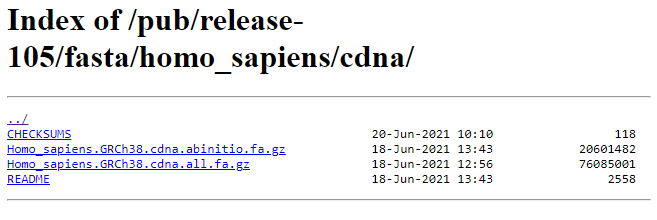

Once found, use your UNIX knowledge to download the file to this notebook via the code-block below.

( _Hint._  If you are unsure how to proceed, your approach to Question 1 and identify the equivalent to the Download button on the  webpage screenshotted above. )

In [14]:
%%bash
wget -nv -O Homo_sapiens.GRCh38.cdna.all.fa.gz 'http://ftp.ensembl.org/pub/release-105/fasta/homo_sapiens/cdna/Homo_sapiens.GRCh38.cdna.all.fa.gz'

2022-04-21 10:26:26 URL:http://ftp.ensembl.org/pub/release-105/fasta/homo_sapiens/cdna/Homo_sapiens.GRCh38.cdna.all.fa.gz [76085001/76085001] -> "Homo_sapiens.GRCh38.cdna.all.fa.gz" [1]


You now have all the files you need to quantify transcript expression.

**Question 6.** What method will you use to quantify RNA transcripts? What advantages does your choice present?

* A) Splice-aware alignment to a genome
* B) Alignment to a transcriptome
* C) Quasi-mapping

<font color='red'>Type your answer here.</font> 

 C) Quasi-mapping:
 - is a representative for lightweight mapping methods 
 - performs quantification directly without generating any intermediate alignment files
 - saves considerable time and space
 - is faster than traditional alignment.

With your choice made, start by installing the necessary program/s to perform the above method in the code-block below:

**# Quantify transcript expression with salmon quant**

**# first Install Salmon version 0.12.0.**

In [15]:
%%bash
source activate envTwo
mamba install -c bioconda salmon=0.12.0 --yes

bioconda/linux-64                                           Using cache
bioconda/noarch                                             Using cache
Transaction

  Prefix: /usr/local/envs/envTwo

  Updating specs:

   - salmon=0.12.0


  Package      Version  Build        Channel                  Size
────────────────────────────────────────────────────────────────────
  Install:
────────────────────────────────────────────────────────────────────

  + bzip2        1.0.8  h7b6447c_0   pkgs/main/linux-64       80kB
  + icu           58.2  he6710b0_3   pkgs/main/linux-64       11MB
  + jemalloc     5.2.1  h2531618_5   pkgs/main/linux-64        1MB
  + libboost    1.73.0  h3ff78a5_11  pkgs/main/linux-64       15MB
  + lz4-c        1.9.3  h295c915_1   pkgs/main/linux-64      189kB
  + salmon      0.12.0  h86b0361_1   bioconda/linux-64         3MB
  + tbb       2021.5.0  hd09550d_0   pkgs/main/linux-64      161kB
  + xz           5.2.5  h7b6447c_0   pkgs/main/linux-64     Cached
  + zstd        

**# Verify whether Salmon will run.**

In [16]:
%%bash
source activate envTwo
salmon

salmon v0.12.0

Usage:  salmon -h|--help or 
        salmon -v|--version or 
        salmon -c|--cite or 
        salmon [--no-version-check] <COMMAND> [-h | options]

Commands:
     index Create a salmon index
     quant Quantify a sample
     alevin single cell analysis
     swim  Perform super-secret operation
     quantmerge Merge multiple quantifications into a single file


Next, consider the procedure and input necessary to produce transcript counts with the program/s you just downloaded. 

**Question 7.** True or False: It is best to align or quasi-map RNA reads directly to a transcriptome, without any additional steps.

* A) True
* B) False

<font color='red'>Type your answer here.</font> It is False because first is needed to create the reference transcriptome index.

Based on your answer, write the code to quantify RNA transcripts in one or more code-blocks below:

**# Create an Salmon index**

In [17]:
%%bash
source activate envTwo
salmon index -t Homo_sapiens.GRCh38.cdna.all.fa.gz -i Homo_sapiens.GRCh38.cdna.all

Version Info: Could not resolve upgrade information in the alotted time.
Check for upgrades manually at https://combine-lab.github.io/salmon


index ["Homo_sapiens.GRCh38.cdna.all"] did not previously exist  . . . creating it
[2022-04-21 10:26:35.476] [jLog] [info] building index
[2022-04-21 10:26:35.477] [jointLog] [info] [Step 1 of 4] : counting k-mers
[2022-04-21 10:26:35.487] [jointLog] [warning] Entry with header [ENST00000631435.1], had length less than the k-mer length of 31 (perhaps after poly-A clipping)
[2022-04-21 10:26:35.487] [jointLog] [warning] Entry with header [ENST00000415118.1], had length less than the k-mer length of 31 (perhaps after poly-A clipping)
[2022-04-21 10:26:35.487] [jointLog] [warning] Entry with header [ENST00000448914.1], had length less than the k-mer length of 31 (perhaps after poly-A clipping)
[2022-04-21 10:26:35.488] [jointLog] [warning] Entry with header [ENST00000434970.2], had length less than the k-mer length of 31 (perhaps after poly-A clipping)
[2022-04-21 10:26:35.488] [jointLog] [warning] Entry with header [ENST00000632684.1], had length less than the k-mer length of 31 (perhaps

In [18]:
%%bash
pwd
ls

/content
data
filtered
Homo_sapiens.GRCh38.cdna.all
Homo_sapiens.GRCh38.cdna.all.fa.gz
Miniconda3-py39_4.10.3-Linux-x86_64.sh
sample_data


**# Quantify transcript expression with salmon quant**

In [19]:
%%bash
source activate envTwo
for file in filtered/*.fastq; do
    FILENAME="$(basename -- $file)"
    ID="${FILENAME%%.*}"
    salmon quant -i Homo_sapiens.GRCh38.cdna.all -l A -r $file --validateMappings --quiet -o "quants/$ID"
done

Version Info: Could not resolve upgrade information in the alotted time.
Check for upgrades manually at https://combine-lab.github.io/salmon
Version Info: Could not resolve upgrade information in the alotted time.
Check for upgrades manually at https://combine-lab.github.io/salmon
Version Info: Could not resolve upgrade information in the alotted time.
Check for upgrades manually at https://combine-lab.github.io/salmon
Version Info: Could not resolve upgrade information in the alotted time.
Check for upgrades manually at https://combine-lab.github.io/salmon
Version Info: Could not resolve upgrade information in the alotted time.
Check for upgrades manually at https://combine-lab.github.io/salmon
Version Info: Could not resolve upgrade information in the alotted time.
Check for upgrades manually at https://combine-lab.github.io/salmon


tcmalloc: large alloc 1412759552 bytes == 0x5562eb650000 @  0x7feebf11d887 0x5562dda93f57 0x5562dda9428f 0x5562dda9db15 0x5562ddbe2237 0x5562ddbe29dc 0x5562ddcf61d5 0x5562ddcdeeb9 0x5562dda2a94a 0x7feebe51fc87 0x5562dda337b9
tcmalloc: large alloc 1412759552 bytes == 0x55d2805b0000 @  0x7f2f847b6887 0x55d273236f57 0x55d27323728f 0x55d273240b15 0x55d273385237 0x55d2733859dc 0x55d2734991d5 0x55d273481eb9 0x55d2731cd94a 0x7f2f83bb8c87 0x55d2731d67b9
tcmalloc: large alloc 1412759552 bytes == 0x563a0ac2c000 @  0x7fe7f17f0887 0x5639fd3f7f57 0x5639fd3f828f 0x5639fd401b15 0x5639fd546237 0x5639fd5469dc 0x5639fd65a1d5 0x5639fd642eb9 0x5639fd38e94a 0x7fe7f0bf2c87 0x5639fd3977b9


tcmalloc: large alloc 1412759552 bytes == 0x55e19a362000 @  0x7f7cef8b9887 0x55e18df4bf57 0x55e18df4c28f 0x55e18df55b15 0x55e18e09a237 0x55e18e09a9dc 0x55e18e1ae1d5 0x55e18e196eb9 0x55e18dee294a 0x7f7ceecbbc87 0x55e18deeb7b9
tcmalloc: large alloc 1412759552 bytes == 0x561c43680000 @  0x7f3d5b6e8887 0x561c35f2af57 0x561c35

With the transcript abundance files now produced, clean up your workspace by removing the intermediary `filtered` directory in the code-block below:

In [20]:
%%bash
rm -r filtered/

#**Part 3: Differential Expression Analysis (DEA)**

Now that you have obtained counts of every transcript, you will want to make comparisons between sample groups to identify occurances of differential expression.

To accomplish this, we will use the R packages introduced previously. In one or more code-blocks below, install the necessary R packages for DEA.

**# R Setup and initial package installatio**n

In [21]:
%load_ext rpy2.ipython

In [22]:
%%R
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager", quiet = TRUE)

In [23]:
%%R
BiocManager::install("tximeta", quiet = TRUE, ask = FALSE)
library(tximeta)

R[write to console]: 'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


R[write to console]: Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

R[write to console]: Installing package(s) 'BiocVersion', 'tximeta'

R[write to console]: also installing the dependencies ‘formatR’, ‘lambda.r’, ‘futile.options’, ‘rjson’, ‘futile.logger’, ‘snow’, ‘BH’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘promises’, ‘htmlwidgets’, ‘crosstalk’, ‘matrixStats’, ‘zlibbioc’, ‘Rcpp’, ‘plogr’, ‘png’, ‘bitops’, ‘XML’, ‘GenomicAlignments’, ‘restfulr’, ‘lazyeval’, ‘BiocParallel’, ‘Rhtslib’, ‘shiny’, ‘DT’, ‘MatrixGenerics’, ‘Biobase’, ‘BiocGenerics’, ‘DelayedArray’, ‘XVector’, ‘RSQLite’, ‘KEGGREST’, ‘RCurl’, ‘BiocIO’, ‘rtracklayer’, ‘biomaRt’, ‘AnnotationFilter’, ‘Rsamtools’, ‘ProtGenerics’, ‘filelock’, ‘interactiveDisplayBase’, ‘GenomeInfoDbData’, ‘SummarizedExperimen

In [24]:
%%R
BiocManager::install("DESeq2", quiet = TRUE, ask = FALSE)
library(DESeq2)

R[write to console]: 'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


R[write to console]: Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

R[write to console]: Installing package(s) 'DESeq2'

R[write to console]: also installing the dependencies 'annotate', 'genefilter', 'locfit', 'geneplotter', 'RcppArmadillo'


R[write to console]: Old packages: 'haven'

R[write to console]: Loading required package: S4Vectors

R[write to console]: Loading required package: stats4

R[write to console]: Loading required package: BiocGenerics

R[write to console]: 
Attaching package: 'BiocGenerics'


R[write to console]: The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


R[write to console]: The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call

**#Create a metadta R data.frame **

Once installation is complete, use one or more code-blocks below to store your sample metadata in an R-accessible `data.frame`. With this, the R packages you installed will be able to access your transcript count data and distinguish whether each sample came from a COVID-infected or healthy individual. 

In [25]:
%%R
sample_names <-c("SRR12007865","SRR12007867","SRR12007869","SRR12007829","SRR12007844","SRR12007847")
sample_type <- c("Control","Control","Control","Treatment","Treatment","Treatment")
files <- paste("/content/quants/", sample_names, "/quant.sf", sep="")
metadata <- data.frame(files, names=sample_names, condition=sample_type, stringsAsFactors=FALSE)
metadata

                                 files       names condition
1 /content/quants/SRR12007865/quant.sf SRR12007865   Control
2 /content/quants/SRR12007867/quant.sf SRR12007867   Control
3 /content/quants/SRR12007869/quant.sf SRR12007869   Control
4 /content/quants/SRR12007829/quant.sf SRR12007829 Treatment
5 /content/quants/SRR12007844/quant.sf SRR12007844 Treatment
6 /content/quants/SRR12007847/quant.sf SRR12007847 Treatment


Then, run the code-blocks below to create a directory for storing the R objects produced during DEA. 

In [26]:
%%R
biocFileCacheDir <- file.path('R','BiocFileCache')
dir.create(biocFileCacheDir, recursive = TRUE, showWarnings = FALSE)
setTximetaBFC(biocFileCacheDir)

R[write to console]: for group use, set the permissions of this directory to allow group write (g+w)



In [27]:
%%bash
chmod g+w  ./R/BiocFileCache/
ls -lh ./R

total 4.0K
drwxrwxr-x 2 root root 4.0K Apr 21 11:02 BiocFileCache


Next, the following steps will facilitate the conversion of transcript-level counts to gene-level counts and later, the annotation of gene accession IDs with their gene nomenclature. 

**Question 8.** What is the difference between a transcript and a gene? Why is it often preferable to convert from transcript-level counts to gene-level counts for DEA?

( _Hint._  Consider alternative splicing and the macromolecules involved. )

<font color='red'>Type your answer here.</font> "Gene" is a genomic sequence that consists of 2 types of regions- sequences that are expressed or encoded as RNA i.e. transcript, called as exons alternating with regions that are not encoded in the RNA/transcript called as introns. While most genes are associated with multiple transcripts, each transcript is only assigned to a single gene (at least in databases). In other words, different genes never share the same transcript.

To perform this conversion, information mapping transcripts to their known gene annotations is necessary. Such information is often stored within GFF/GTF format files. The details of this format can be found here: 
[GFF/GTF File Format - Definition and supported options](http://ensembl.org/info/website/upload/gff.html)


Like the FASTA transcriptome you used in the previous section, gene annotation files (GTF/GFF) may also be located on the Ensembl website. In the code-block below, locate and download the gene annotation file for the latest Ensembl release of the GRCh38.p13 human assembly. 


The file you need to locate is called `Homo_sapiens.GRCh38.105.gtf.gz` as shown below. 






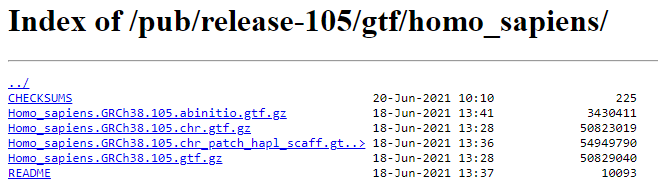

In [28]:
%%bash
wget -nv -O Homo_sapiens.GRCh38.105.gtf.gz 'http://ftp.ensembl.org/pub/release-105/gtf/homo_sapiens/Homo_sapiens.GRCh38.105.gtf.gz'

2022-04-21 11:02:59 URL:http://ftp.ensembl.org/pub/release-105/gtf/homo_sapiens/Homo_sapiens.GRCh38.105.gtf.gz [50829040/50829040] -> "Homo_sapiens.GRCh38.105.gtf.gz" [1]


Now that the annotation file has been added to the notebook environment, you will need to link it to the FASTA transcriptome and its Salmon index to create a "linked transcriptome" as defined within the Tximeta vignette. 

To do so, fill in the ◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼ within the code-blocks below then run them to obtain genes-level count data using the "linked transcriptome" and sample metadata contained within `coldata`. 

In [29]:
%%R
fastaFile <- 'Homo_sapiens.GRCh38.cdna.all.fa.gz' 
gtfFile <- 'Homo_sapiens.GRCh38.105.gtf.gz'
makeLinkedTxome(indexDir='Homo_sapiens.GRCh38.cdna.all',
                source='Ensembl',
                organism='Homo sapiens',
                release='105',
                genome='GRCh38.p13',
                fasta=fastaFile,
                gtf=gtfFile)

transcriptSummarizedExp <- tximeta(metadata, type='salmon', txOut=TRUE, useHub=FALSE)

R[write to console]: NOTE: linkedTxome with source='Ensembl', ensembldb will be used to parse GTF.
this may produce errors if the GTF is not from Ensembl, or has been modified.
set useHub=FALSE in tximeta to avoid download of reference txome from AnnotationHub.
alternatively use a different string for source argument

R[write to console]: writing linkedTxome to Homo_sapiens.GRCh38.cdna.all.json

R[write to console]: saving linkedTxome in bfc (first time)

R[write to console]: importing quantifications

R[write to console]: reading in files with read_tsv

R[write to console]: 1 
R[write to console]: 2 
R[write to console]: 3 
R[write to console]: 4 
R[write to console]: 5 
R[write to console]: 6 
R[write to console]: 

R[write to console]: found matching linked transcriptome:
[ Ensembl - Homo sapiens - release 105 ]

R[write to console]: building EnsDb with 'ensembldb' package

R[write to console]: NOTE: linkedTxome with source='Ensembl', ensembldb will be used to parse GTF.
this may pr

In [30]:
%%R
SummarizedExperiment <- summarizeToGene(transcriptSummarizedExp)

R[write to console]: loading existing EnsDb created: 2022-04-21 11:03:54

R[write to console]: obtaining transcript-to-gene mapping from database

R[write to console]: generating gene ranges

R[write to console]: summarizing abundance

R[write to console]: summarizing counts

R[write to console]: summarizing length



The output of these two code-blocks is an R SummarizedExperiment object storing gene-level abundances. With this, you can now run count normalization and statistical tests to discover differentally expressed genes. 

**Question 9.** Before comparing RNA-Seq gene count data, it is necessary to normalize those counts. In your own words, describe what the purpose of this is.




( _Hint._  Refer to the Module 5 "Basics of RNA-Seq technology and bioinformatics tools" slides if you are unsure. )

<font color='red'>Type your answer here.</font> Before comparing RNA-Seq gene count data, it is necessary to normalize those counts because the normalization corrects the RNA structure between diferent samples.

For the reason you just described, run the normalization and statisical test steps of DEA using one or more code-blocks below. 

**# Import summarizedExperiment into DESeq2 with the DESeqDataSet() function.**

In [31]:
%%R
dds <- DESeqDataSet(SummarizedExperiment, design = ~ condition)

R[write to console]: using counts and average transcript lengths from tximeta



**# Run DESeq2's core function on the DESeqDataSet named dds.**

In [32]:
%%R
dds <- DESeq(dds)

R[write to console]: estimating size factors

R[write to console]: using 'avgTxLength' from assays(dds), correcting for library size

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



The output of these steps is another special R object. This object contains the normalized abundance of all genes contained within the FASTA transcriptome that were successfully annotated. As one might expect, it typical for only a portion of these genes to show any expression. To assess this difference in your own data, run the two code-blocks below.

In [33]:
%%R
nrow(dds)

[1] 34452


In [34]:
%%R
nrow(dds[ rowSums(counts(dds)) > 1, ])

[1] 18982


**Question 10.** In the above code, what does the `nrow()` function do? What does the first output number represent? What does the second output number represent?

<font color='red'>Type your answer here.</font> The nrow() function return the number of rows or columns of an array. The first output represent the number of genes before filtering, the second output represent the number of genes after filtering. dds function remove genes with 0-1 total reads

Knowing this, use the above two code-blocks to write R code that will filter out the unexpressed genes. This should produce a reduced version of the R object called `ddsTwo`.

In [35]:
%%R
ddsTwo <- dds[ rowSums(counts(dds)) > 1, ]

Next, fill in each ◼◼◼◼◼ below with the correct `sample_type` label (ex. "Healthy" or "COVID") to extract a results table from the reduced object. The first ◼◼◼◼◼ and second ◼◼◼◼◼ will serve as the numerator and divisor of fold change respectively. 

In [36]:
%%R
resultsTable <- results(ddsTwo, contrast=c("condition","Control","Treatment"), tidy=TRUE)
head(resultsTable)

              row    baseMean log2FoldChange     lfcSE       stat     pvalue
1 ENSG00000000003    2.547127      0.7528011 1.6160048  0.4658409 0.64132942
2 ENSG00000000419   63.120896      0.1993429 0.3931370  0.5070570 0.61211483
3 ENSG00000000457   52.294424      0.8666321 0.4059589  2.1347777 0.03277917
4 ENSG00000000460   23.971783     -0.5158029 0.5985987 -0.8616839 0.38886151
5 ENSG00000000938 1699.320785      0.1079750 0.2776892  0.3888340 0.69739895
6 ENSG00000000971   15.945091     -1.0981506 0.8048613 -1.3643974 0.17244254
       padj
1        NA
2 0.9047937
3 0.2866046
4 0.8213180
5 0.9330057
6 0.6312430


Finally, run the code below to add a new column to the results table containg the official human gene nomenclature for each Ensembl gene accession. 

In [37]:
%%R
resultsTable <- cbind(resultsTable, gene_name = gsub('-','_',rowData(ddsTwo)$gene_name))
head(resultsTable)

              row    baseMean log2FoldChange     lfcSE       stat     pvalue
1 ENSG00000000003    2.547127      0.7528011 1.6160048  0.4658409 0.64132942
2 ENSG00000000419   63.120896      0.1993429 0.3931370  0.5070570 0.61211483
3 ENSG00000000457   52.294424      0.8666321 0.4059589  2.1347777 0.03277917
4 ENSG00000000460   23.971783     -0.5158029 0.5985987 -0.8616839 0.38886151
5 ENSG00000000938 1699.320785      0.1079750 0.2776892  0.3888340 0.69739895
6 ENSG00000000971   15.945091     -1.0981506 0.8048613 -1.3643974 0.17244254
       padj gene_name
1        NA    TSPAN6
2 0.9047937      DPM1
3 0.2866046     SCYL3
4 0.8213180  C1orf112
5 0.9330057       FGR
6 0.6312430       CFH


#**Part 4: Data Visualization &  Interpretation**

This section is empty at the moment. Check the public version again later for updates. 

Link: https://colab.research.google.com/drive/10-RoxjWh1kggFulf4O8FgthOrLoxOnkA?usp=sharing


After completing the previous section, you now have an R `data.frame` containing your samples' gene-level expession data combined with gene-name annotations. With this and your `DESeqDataSet` object, you will be able to use what you learned about Data Visualization to organize your processed data and highlight the parts of it relevant to your hypotheses of interest. 

To start, consider the plots you have been introduced to so far in previous Differential Expression Anlysis assignments. These plots include Volcano Plots, Principal Component Analysis (PCA) plots, and Hierarchically Clustered Heatmaps. 

For the first plot, produce a Volcano plot in the one or more code-blocks below. Take note to use the correct p-value column from your results `data.frame`. 

**# Download and install the EnhancedVolcano package.**

In [38]:
%%R
devtools::install_github('kevinblighe/EnhancedVolcano', quiet = TRUE)
library(EnhancedVolcano)

R[write to console]: Installing 1 packages: ggrepel

R[write to console]: Loading required package: ggplot2

R[write to console]: Loading required package: ggrepel



**# Use EnhancedVolcano's core function to make a volcano plot**

In [39]:
%%R
pdf("volcanoPlot.pdf", width = 9, height = 9)
EnhancedVolcano(resultsTable, x = 'log2FoldChange', y = 'pvalue', pCutoff = 10e-6, FCcutoff = 1,  pointSize = 1, title = 'Treatment vs. Control', lab = resultsTable$row, labSize = 3.0,  parseLabels = TRUE, drawConnectors = TRUE, widthConnectors = 0.2)

**Question 11.** What aspects of Differential Expression Analysis datasets are often highlighted using Volcano Plots.

<font color='red'>Type your answer here.</font> Volcano plots are commonly used to display the results of RNA-seq or other omics experiments. A volcano plot is a type of scatterplot that shows statistical significance (P value) versus magnitude of change (fold change). It enables quick visual identification of genes with large fold changes that are also statistically significant. These may be the most biologically significant genes. In a volcano plot, the most upregulated genes are towards the right, the most downregulated genes are towards the left, and the most statistically significant genes are towards the top.

**Question 12.** In your own words, describe what the multiple comparisons problem is and how it relates to Differential Expression Analysis.

<font color='red'>Type your answer here.</font> Multiple comparisons arise when a statistical analysis involves multiple simultaneous statistical tests, each of which has a potential to produce a "discovery." A stated confidence level generally applies only to each test considered individually, but often it is desirable to have a confidence level for the whole family of simultaneous tests.
This is the problem of multiple comparisons, in that we would like to control the false positive rate not just for any single test but also for
the entire collection (or family) of tests that makes up our experiment.
Given the large number of transcripts in a given data-set, the likelihood of accepting a false conclusion becomes large if we use the traditional statistics for single hypothesis testing multiple times in a row. This problem is generally referred to as the Multiple Testing problem, and is not sequencing specific – in fact, it is relevant to many areas of bio-statistics, especially in the era of big data.

**Question 13.** Below, list the names of two genes that exhibited much higher expression within the COVID cohort. Likewise, do the same for two genes that exhibited much lower expression within the COVID cohort.

<font color='red'>Type your answer here.</font> C1orf112 and CFH - genes that exhibited much lower expression within the COVID cohort;  SCYL3 and TSPAN6 - genes that exhibited much higher expression within the COVID cohort

Next, create a PCA plot below using one or more code-blocks. Be sure to apply a variance-stabilizing transformation to the input data prior to plotting. This will reduce the bias towards the most highly expressed genes.

In [40]:
%%R
dst <- vst(dds, blind=FALSE)
pdf("PCA.pdf", width = 7, height = 5)
plotPCA(dst, intgroup="condition")

**Question 14.** With your own words, define what dimensionality reduction is and state what the dimensions summarized in your PCA plot are. 

<font color='red'>Type your answer here.</font> Dimensionality reduction involves reducing the number of input variables or columns in modeling data. In my PCA plot are reduce the bias towards the most highly expressed genes.

**Question 15.** Using your own words, what is homoscedasticty and heteroscedasticity? When you apply a varriance-stablizing transcformation, are you correcting your data to be more homoscedastic or heteroscedastic? 

<font color='red'>Type your answer here.</font> Simply put, homoscedasticity means “having the same scatter.” For it to exist in a set of data, the points must be about the same distance from the line. The opposite is heteroscedasticity (“different scatter”), where points are at widely varying distances from the regression line. A approach for dealing with heteroscedasticity is to transform the dependent variable using one of the variance stabilizing transformations.  A logarithmic transformation can be applied to highly skewed variables, while count variables can be transformed using a square root transformation.  

Both the Volcano Plot and PCA plots are best made within R because of the simplicity of the EnhancedVolcano package, and the PCA plot's reliance on the un-transformed differential expression values stored within the DESeqDataSet object. 

However, sometimes you will want to export data outside of R for processing or visualization with other, non-R software. You can perform this export process on your variance-stabilized data using the code displayed here. This code assumes the name of your transformed data (a DESeqTransform object) is `dst`. 



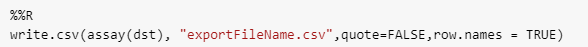

In a code-block below, run this function to produce a `.csv` format file. 

In [41]:
%%R
rv <- rowVars(assay(dst))
topVarGenes <- assay(dst)[head(order(rv, decreasing=TRUE),100),]
head(topVarGenes)

                SRR12007865 SRR12007867 SRR12007869 SRR12007829 SRR12007844
ENSG00000244734    7.093506    8.592938    6.585670   13.888376    6.867890
ENSG00000188536    6.816820    7.948990    6.338227   12.553833    6.833826
ENSG00000206172    5.919559    6.950680    5.445403   11.477332    7.227808
ENSG00000260261    5.772292    5.796019    5.747924    5.789834    5.831025
ENSG00000102554    5.740593    5.828774    5.687249   11.289652    5.940566
ENSG00000211625    5.883514    6.171341    5.756268   10.465729   10.320084
                SRR12007847
ENSG00000244734   16.376251
ENSG00000188536   14.962515
ENSG00000206172   13.813358
ENSG00000260261   11.411983
ENSG00000102554    6.195495
ENSG00000211625    7.747720


In [42]:
%%R
transformedData <- cbind(topVarGenes, gene_name = gsub('-','_',rowData(dst)$gene_name))
head(transformedData)

                SRR12007865        SRR12007867        SRR12007869       
ENSG00000244734 "7.09350593197572" "8.59293776929676" "6.58566959261644"
ENSG00000188536 "6.81682015647167" "7.94899033538108" "6.33822749038871"
ENSG00000206172 "5.91955941448561" "6.95068001541461" "5.44540318074067"
ENSG00000260261 "5.77229238710802" "5.79601914021397" "5.74792443059632"
ENSG00000102554 "5.74059273138768" "5.82877422701422" "5.68724904563155"
ENSG00000211625 "5.88351359927549" "6.17134096231282" "5.75626755146572"
                SRR12007829        SRR12007844        SRR12007847       
ENSG00000244734 "13.8883763863149" "6.86789031752204" "16.3762512927973"
ENSG00000188536 "12.5538332036446" "6.83382566351353" "14.9625148225164"
ENSG00000206172 "11.477331872409"  "7.22780839124366" "13.8133580691447"
ENSG00000260261 "5.7898335683482"  "5.83102464424604" "11.4119833442748"
ENSG00000102554 "11.2896516214039" "5.94056626529401" "6.19549476523122"
ENSG00000211625 "10.4657285937015" "10.320084266359

In [43]:
%%R
write.csv(transformedData, 'exportFileName.csv', quote = FALSE, row.names = TRUE)

In past lessons, we introduced the power of the Python library Seaborn for easily producing publication-worthy graphs.  So while we have previously used the R function `heatmap.2()` to create a heiarchially-clustered heatmap, we can now use Seaborn as well.  

With one or more the code-blocks below, plot a Seaborn clustermap from a **subset** of your transformed differential expression data. 

Note that like Seaborn's `heatmap()` function, `clustermap()` also requires maxtrix data (instead of categorical data) as input. 

For more information about Seaborn's `clustermap()` function, you may refer to the documentation here:
https://seaborn.pydata.org/generated/seaborn.clustermap.html



In [44]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('exportFileName.csv')
df.head()

,Unnamed: 0,SRR12007865,SRR12007867,SRR12007869,SRR12007829,SRR12007844,SRR12007847,gene_name
0,ENSG00000244734,7.093506,8.592938,6.585670,13.888376,6.867890,16.376251,TSPAN6
1,ENSG00000188536,6.816820,7.948990,6.338227,12.553833,6.833826,14.962515,TNMD
2,ENSG00000206172,5.919559,6.950680,5.445403,11.477332,7.227808,13.813358,DPM1
3,ENSG00000260261,5.772292,5.796019,5.747924,5.789834,5.831025,11.411983,SCYL3
4,ENSG00000102554,5.740593,5.828774,5.687249,11.289652,5.940566,6.195495,C1orf112


In [45]:
columnsOfInterest=['SRR12007829','SRR12007844','SRR12007847','SRR12007865','SRR12007867','SRR12007869','gene_name']
df = df[columnsOfInterest]
df.head()

,SRR12007829,SRR12007844,SRR12007847,SRR12007865,SRR12007867,SRR12007869,gene_name
0,13.888376,6.867890,16.376251,7.093506,8.592938,6.585670,TSPAN6
1,12.553833,6.833826,14.962515,6.816820,7.948990,6.338227,TNMD
2,11.477332,7.227808,13.813358,5.919559,6.950680,5.445403,DPM1
3,5.789834,5.831025,11.411983,5.772292,5.796019,5.747924,SCYL3
4,11.289652,5.940566,6.195495,5.740593,5.828774,5.687249,C1orf112


In [46]:
dfData = df.set_index('gene_name')
dfData

,SRR12007829,SRR12007844,SRR12007847,SRR12007865,SRR12007867,SRR12007869
gene_name,,,,,,
TSPAN6,13.888376,6.867890,16.376251,7.093506,8.592938,6.585670
TNMD,12.553833,6.833826,14.962515,6.816820,7.948990,6.338227
DPM1,11.477332,7.227808,13.813358,5.919559,6.950680,5.445403
SCYL3,5.789834,5.831025,11.411983,5.772292,5.796019,5.747924
C1orf112,11.289652,5.940566,6.195495,5.740593,5.828774,5.687249
...,...,...,...,...,...,...
GCFC2,9.722446,10.974551,10.051842,6.891627,8.893196,8.043037
WDR54,6.293372,5.969459,6.228920,5.952217,9.710353,6.187035
CROT,5.606867,5.829405,5.539768,9.193443,5.809645,5.445403


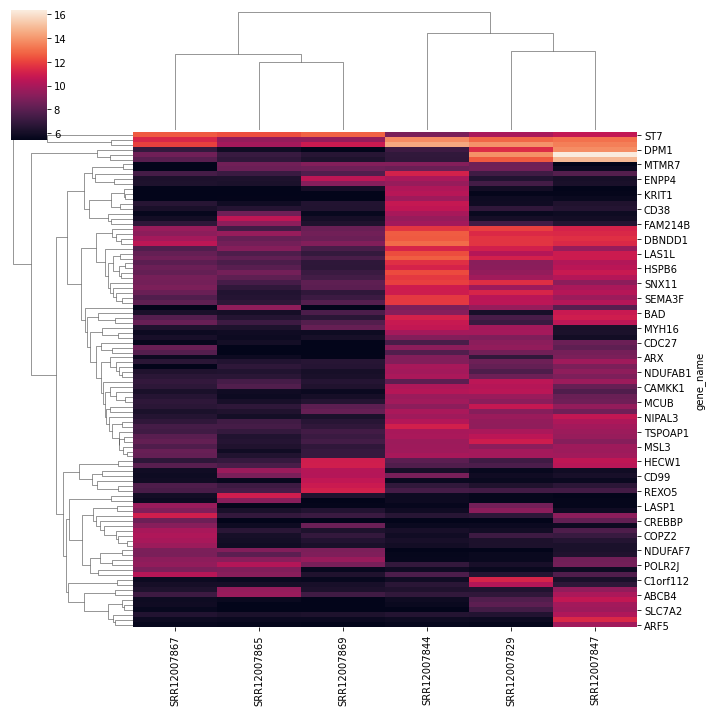

In [47]:
clustergrid = sns.clustermap(dfData)
axes = clustergrid.ax_heatmap
axes.set_ylabel("gene_name")
clustergrid

import matplotlib.pyplot as plt
plt.savefig("clustermap.pdf", bbox_inches='tight')

**Question 16.** True or False? When using the Pandas library to subset a DataFrame, any changes stored under the same DataFrame name will overwrite the previous DataFrame.

<font color='red'>Type your answer here.</font> True

Congratulations! You now have three different graphical representations of your data that you can use to present your data in posters, papers, and more.

#**Part 5: Sharing your data and results**

This section is empty at the moment. Check the public version again later for updates. 

Link: https://colab.research.google.com/drive/10-RoxjWh1kggFulf4O8FgthOrLoxOnkA?usp=sharing


Now that you have obtained your input data, processed it into tabular form, and produced visualizations from it, you are now ready to share your results with others. So, using what you previously learned about Git and GitHub, create a **private** repo with a structure similar to what was introduced at the beginning of the course.

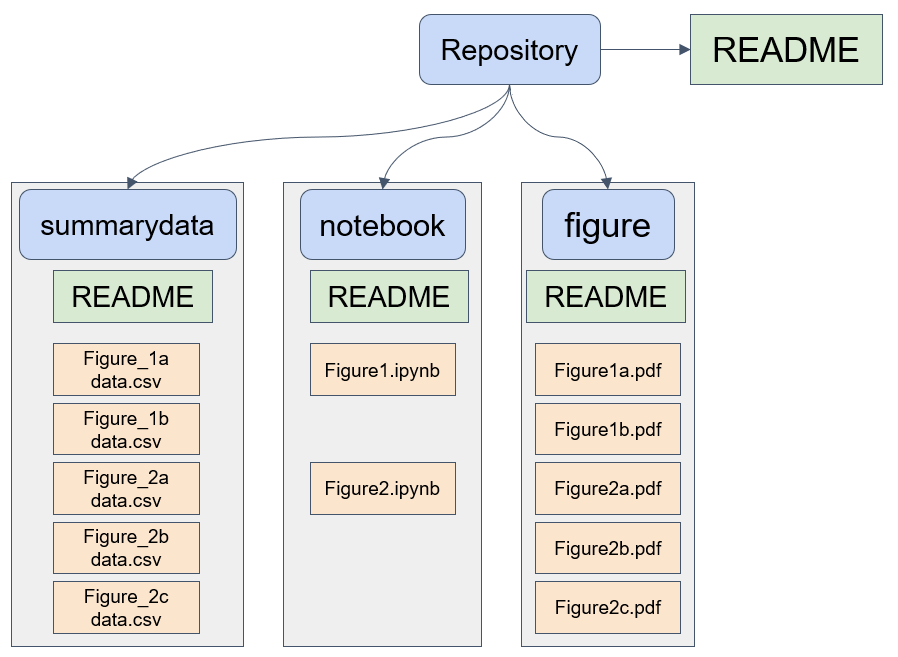

**Question 17.** Describe how sharing your data, code, and figures in this manner increases the transparency and reproducibility of your research.

<font color='red'>Type your answer here.</font> The creation of GitHub repo with the structure shown above is easy to acces. Usually, GitHub repo contain the README.txt files that contain descriptions of its directory's contents, whether the contents are files or subdirectories.

To start, reorganize your project directory to be similar to the structure above prior to converting your working directory into a repo. To peform this, you will need to download your copy of the notebook as a `.ipynb` file via File -> Download -> Download .ipynb at the top of this webpage.

Additionally, if you previously deleted your input `.zst` files, remember to re-download them for inclusion in your repository's data directory.

In [48]:
%%bash
rm fastp.html fastp.json
ls

clustermap.pdf
data
exportFileName.csv
Homo_sapiens.GRCh38.105.gtf.gz
Homo_sapiens.GRCh38.cdna.all
Homo_sapiens.GRCh38.cdna.all.fa.gz
Homo_sapiens.GRCh38.cdna.all.json
Miniconda3-py39_4.10.3-Linux-x86_64.sh
PCA.pdf
quants
R
sample_data
volcanoPlot.pdf


rm: cannot remove 'fastp.html': No such file or directory
rm: cannot remove 'fastp.json': No such file or directory


In [49]:
%%bash
mv data SummaryData

In [50]:
%%bash
ls

clustermap.pdf
exportFileName.csv
Homo_sapiens.GRCh38.105.gtf.gz
Homo_sapiens.GRCh38.cdna.all
Homo_sapiens.GRCh38.cdna.all.fa.gz
Homo_sapiens.GRCh38.cdna.all.json
Miniconda3-py39_4.10.3-Linux-x86_64.sh
PCA.pdf
quants
R
sample_data
SummaryData
volcanoPlot.pdf


In [51]:
%%bash
mkdir notebook

In [52]:
%%bash
mkdir figures
mv *.pdf figures/

Once you have created the above file structure, delete all other files and folders in `/content` and create the README files as shown in the figure above. 

In [53]:
%%bash
rm -r Homo_sapiens.GRCh38.cdna.all/
rm -r R/
rm -r quants/
rm -r Homo_sapiens.GRCh38.105.gtf.gz
rm -r Homo_sapiens.GRCh38.cdna.all.fa.gz
rm -r Homo_sapiens.GRCh38.cdna.all.json
rm -r exportFileName.csv
rm -r Miniconda3-py39_4.10.3-Linux-x86_64.sh
rm -r sample_data/

In [54]:
%%bash
cat > README.md
This Repository has three directorys: 
the summarydata directory stores tabular data files (RNA-Seq data from bulk peripheral blood mononuclear cells (PBMCs) of both healthy and COVID-19 infected individuals) 
the notebook directory stores Jupyter notebook files, 
the figure directory stores project's figures.

In [55]:
%%bash
cat > SummaryData/README.md
The Summarydata directory stores: 
SRR12007829.fastq.zst - RNA-Seq data from the bulk peripheral blood mononuclear cells (PBMCs) of a COVID-infected individual
SRR12007844.fastq.zst - RNA-Seq data from the bulk peripheral blood mononuclear cells (PBMCs) of a COVID-infected individual
SRR12007847.fastq.zst - RNA-Seq data from the bulk peripheral blood mononuclear cells (PBMCs) of a COVID-infected individual

SRR12007865.fastq.zst - RNA-Seq data from the bulk peripheral blood mononuclear cells (PBMCs) of a healthy individual
SRR12007867.fastq.zst - RNA-Seq data from the bulk peripheral blood mononuclear cells (PBMCs) of a healthy individual
SRR12007899.fastq.zst - RNA-Seq data from the bulk peripheral blood mononuclear cells (PBMCs) of a healthy individual

In [56]:
%%bash
cat > figures/README.md
The figures directory stores: 
PCA.pdf the plot that comparing overall expression between samples
clustermap.pdf for differential expression data 
volcanoPlot.pdf plot that highlighting the most important differentially expressed genes

In [57]:
%%bash
cat > notebook/README.md
The notebook directory stores: 
- USMFFinalProject_Public.ipynb include a lot of code to achieve the goal

**Question 18.** What is the purpose of a README file in the parent Repository directory?

<font color='red'>Type your answer here.</font> The README.txt files in the parent Repository directory contain descriptions of its directory's contents, whether the contents are files or subdirectories etc. Also a README is a text file that introduces and explains a project. It contains information that is commonly required to understand what the project is about.

**Question 19.** What is the purpose of the README files in the subdirectories?

<font color='red'>Type your answer here.</font> The README.txt files in the in the subdirectories contain descriptions of contents of this subdirectories.

Then, convert your project directory into a Git respoistory and upload it as a **private** GitHub repo using one or more code-blocks below.

In [58]:
%%bash
git

usage: git [--version] [--help] [-C <path>] [-c <name>=<value>]
           [--exec-path[=<path>]] [--html-path] [--man-path] [--info-path]
           [-p | --paginate | --no-pager] [--no-replace-objects] [--bare]
           [--git-dir=<path>] [--work-tree=<path>] [--namespace=<name>]
           <command> [<args>]

These are common Git commands used in various situations:

start a working area (see also: git help tutorial)
   clone      Clone a repository into a new directory
   init       Create an empty Git repository or reinitialize an existing one

work on the current change (see also: git help everyday)
   add        Add file contents to the index
   mv         Move or rename a file, a directory, or a symlink
   reset      Reset current HEAD to the specified state
   rm         Remove files from the working tree and from the index

examine the history and state (see also: git help revisions)
   bisect     Use binary search to find the commit that introduced a bug
   grep       Prin

In [59]:
%%bash
ls -al ~/.ssh


ls: cannot access '/root/.ssh': No such file or directory


**# Create a .gitignore file that tells Git to ignore the hidden .config folder**

In [60]:
%%bash
cat > .gitignore
.*
.gitignore

**# Set an identity with git config.**

In [61]:
%%bash
git config --global user.name "Daniela Galea-Abdusa"
git config --global user.email "daniela.abdusa@usmf.md"

**# Convert /content into a Git repository with git init.**

In [62]:
%%bash
git init

Initialized empty Git repository in /content/.git/


In [63]:
%%bash
ls -a

.
..
.config
figures
.git
.gitignore
notebook
README.md
SummaryData


In [64]:
%%bash
pwd

/content


In [65]:
%%bash
cd content
pwd

/content


bash: line 1: cd: content: No such file or directory


**# Add files to the notebook staging area with git add and confirm them with git diff.**

In [66]:
%%bash
git add -A

In [67]:
%%bash
git diff --name-only --cached

README.md
SummaryData/README.md
SummaryData/SRR12007829.fastq.zst
SummaryData/SRR12007844.fastq.zst
SummaryData/SRR12007847.fastq.zst
SummaryData/SRR12007865.fastq.zst
SummaryData/SRR12007867.fastq.zst
SummaryData/SRR12007869.fastq.zst
SummaryData/fastp.html
SummaryData/fastp.json
figures/PCA.pdf
figures/README.md
figures/clustermap.pdf
figures/volcanoPlot.pdf
notebook/README.md


**# Commit the changes to create a new version of the Git repository with git commit.**

In [68]:
%%bash
git commit -m "Created the final project repository"

[master (root-commit) 184b4e5] Created the final project repository
 15 files changed, 2601 insertions(+)
 create mode 100644 README.md
 create mode 100644 SummaryData/README.md
 create mode 100644 SummaryData/SRR12007829.fastq.zst
 create mode 100644 SummaryData/SRR12007844.fastq.zst
 create mode 100644 SummaryData/SRR12007847.fastq.zst
 create mode 100644 SummaryData/SRR12007865.fastq.zst
 create mode 100644 SummaryData/SRR12007867.fastq.zst
 create mode 100644 SummaryData/SRR12007869.fastq.zst
 create mode 100644 SummaryData/fastp.html
 create mode 100644 SummaryData/fastp.json
 create mode 100644 figures/PCA.pdf
 create mode 100644 figures/README.md
 create mode 100644 figures/clustermap.pdf
 create mode 100644 figures/volcanoPlot.pdf
 create mode 100644 notebook/README.md


**# Paste the code from github to push the repository in this notebook to GitHub.**

In [69]:
%%bash
git remote add origin git@github.com:danielaabdusa/USMFFinalProject_Public.git
git branch -M main
git push -u origin main

Host key verification failed.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


**# Generate a private SSH key.**

In [70]:
%%bash
ssh-keygen -t ed25519 -C '[daniela.abdusa@usmf.md]' -f ~/.ssh/id_ed25519 -P ''
cat > ~/.ssh/config
Host *
  AddKeysToAgent yes
  IdentityFile ~/.ssh/id_ed25519

Generating public/private ed25519 key pair.
Your identification has been saved in /root/.ssh/id_ed25519.
Your public key has been saved in /root/.ssh/id_ed25519.pub.
The key fingerprint is:
SHA256:dD8oZHu8FuLji8rIY4ufDsxYSZNqT933Z3UOawAXUks [daniela.abdusa@usmf.md]
The key's randomart image is:
+--[ED25519 256]--+
|          ..E    |
|   .       o o   |
|  +     + o o    |
| o o. .+ + =     |
|..o. . .S.= + ...|
|=.o    ..+.o o.+.|
|oo .    o o. oo .|
| +o+   o o  o.   |
|.+Boo.. o.       |
+----[SHA256]-----+


In [71]:
%%bash
eval "$(ssh-agent -s)"
ssh-add ~/.ssh/id_ed25519

Agent pid 29602


Identity added: /root/.ssh/id_ed25519 ([daniela.abdusa@usmf.md])


**# Generate and register a "keyhole" (public key).**

In [72]:
%%bash
cat ~/.ssh/id_ed25519.pub

ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAIMqKG/Y9DVQ12Yae5VzJny2CMZ8mdPm2AUztV51hbx1S [daniela.abdusa@usmf.md]


In [73]:
%%bash
ssh -o "StrictHostKeyChecking no" -T git@github.com

git@github.com: Permission denied (publickey).


In [74]:
%%bash
git remote add origin git@github.com:danielaabdusa/USMFFinalProject_Public.git
git branch -M main
git push -u origin main

fatal: remote origin already exists.
git@github.com: Permission denied (publickey).
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


**# Push the new Git repository to the online GitHub repo with git push.**

In [75]:
%%bash
git push

fatal: The current branch main has no upstream branch.
To push the current branch and set the remote as upstream, use

    git push --set-upstream origin main



Once completed, follow the instructions outlined here to share your repository with one of our TA's accounts, `CynthiaFlaire`:

https://docs.github.com/en/account-and-profile/setting-up-and-managing-your-github-user-account/managing-access-to-your-personal-repositories/inviting-collaborators-to-a-personal-repository

Note we may ask you to share your private repo with additional TAs at a later date.

With that completed, Congratulations! You have finished the entirety of your capstone project!